1. 테스트 파일 나눠서 자모비 돌리기
2. 제주지역

**Libraries**

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
from matplotlib import font_manager, rc
# 한글 폰트 설정
font_name = font_manager.FontProperties(fname="/Windows/Fonts/nanumgothiccoding.ttf").get_name()
rc('font', family=font_name)

# Basic

In [3]:
jeju = pd.read_csv('./jeju_data_ver1/201901-202003.csv')

In [6]:
# jeju.describe(), jeju.info()
jeju.isnull().sum()

REG_YYMM             0
CARD_SIDO_NM         0
CARD_CCG_NM      87213
STD_CLSS_NM          0
HOM_SIDO_NM          0
HOM_CCG_NM      147787
AGE                  0
SEX_CTGO_CD          0
FLC                  0
CSTMR_CNT            0
AMT                  0
CNT                  0
dtype: int64

결측값이 약 20만개정도 있는 것을 확인할 수 있다.

In [8]:
jeju[jeju['HOM_CCG_NM'].isnull()]

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
420,201901,강원,강릉시,과실 및 채소 소매업,세종,NaN,30s,1,2,3,58000,3
421,201901,강원,강릉시,과실 및 채소 소매업,세종,NaN,40s,1,3,3,263000,4
1189,201901,강원,강릉시,기타 대형 종합 소매업,세종,NaN,20s,1,1,3,176540,3
1190,201901,강원,강릉시,기타 대형 종합 소매업,세종,NaN,20s,2,1,4,234880,6
1191,201901,강원,강릉시,기타 대형 종합 소매업,세종,NaN,30s,1,2,4,177640,5
...,...,...,...,...,...,...,...,...,...,...,...,...
24697496,202003,충북,충주시,한식 음식점업,세종,NaN,30s,2,2,5,188500,8
24697497,202003,충북,충주시,한식 음식점업,세종,NaN,40s,1,3,18,1056500,28
24697498,202003,충북,충주시,한식 음식점업,세종,NaN,50s,1,4,25,770150,35
24697499,202003,충북,충주시,한식 음식점업,세종,NaN,50s,2,4,4,19500,4


결측값은 가맹점 시군구와 카드 사용자의 거주 시군구이다.\
해당 값은 시도 값이 '세종'으로, 세종의 시군구가 NaN 값으로 들어간 것을 알 수 있다.\
이후 해당 컬럼을 독립변수에서 제외 할 예정이므로, 결측값을 따로 처리하지 않는다.

# Data Cleansing

In [4]:
# 날짜 처리

def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

data = jeju.copy()
data = data.fillna('')

data['month'] = data['REG_YYMM'].apply(lambda x: grap_month(x))
data['year'] = data['REG_YYMM'].apply(lambda x: grap_year(x))

data = data.drop(['REG_YYMM'], axis = 1)

data

,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,month,year
0,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4,1,2019
1,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8,1,2019
2,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6,1,2019
3,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5,1,2019
4,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24697787,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,3,43300,4,3,2020
24697788,충북,충주시,휴양콘도 운영업,충북,충주시,40s,1,3,3,35000,3,3,2020
24697789,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,4,188000,6,3,2020
24697790,충북,충주시,휴양콘도 운영업,충북,충주시,50s,2,4,4,99000,6,3,2020


In [5]:
# 데이터 정제

data = data.drop(['CARD_CCG_NM', 'HOM_CCG_NM'], axis = 1)

columns =['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE',
          'SEX_CTGO_CD', 'FLC', 'year', 'month']
data = data.groupby(columns).sum().reset_index(drop = False)
data

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,CSTMR_CNT,AMT,CNT
0,강원,건강보조식품 소매업,강원,20s,1,1,2019,1,4,311200,4
1,강원,건강보조식품 소매업,강원,20s,1,1,2019,2,3,605000,3
2,강원,건강보조식품 소매업,강원,20s,1,1,2019,6,3,139000,3
3,강원,건강보조식품 소매업,강원,20s,1,1,2019,8,3,27500,3
4,강원,건강보조식품 소매업,강원,20s,1,1,2019,9,3,395500,3
...,...,...,...,...,...,...,...,...,...,...,...
1057389,충북,휴양콘도 운영업,충북,70s,2,5,2019,3,3,148000,4
1057390,충북,휴양콘도 운영업,충북,70s,2,5,2019,5,5,329800,7
1057391,충북,휴양콘도 운영업,충북,70s,2,5,2019,10,7,557800,7
1057392,충북,휴양콘도 운영업,충북,70s,2,5,2019,12,3,247800,3


In [6]:
# 인코딩
# Object 문자로 된 컬럼은 LabelEncoder로 인덱스 도출 (범주형 데이터를 dummies화 시켜서 one-hot 인코딩 사용하는 것과 비슷한 기능)
from sklearn.preprocessing import LabelEncoder

dtypes = data.dtypes
encoders = {}

for column in data.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(data[column])
        encoders[column] = encoder
        
data_num = data.copy()
for column in encoders.keys():
    encoder = encoders[column]
    data_num[column] = encoder.transform(data[column])
    
data_num

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,CSTMR_CNT,AMT,CNT
0,0,0,0,1,1,1,2019,1,4,311200,4
1,0,0,0,1,1,1,2019,2,3,605000,3
2,0,0,0,1,1,1,2019,6,3,139000,3
3,0,0,0,1,1,1,2019,8,3,27500,3
4,0,0,0,1,1,1,2019,9,3,395500,3
...,...,...,...,...,...,...,...,...,...,...,...
1057389,16,40,16,6,2,5,2019,3,3,148000,4
1057390,16,40,16,6,2,5,2019,5,5,329800,7
1057391,16,40,16,6,2,5,2019,10,7,557800,7
1057392,16,40,16,6,2,5,2019,12,3,247800,3


# EDA

In [92]:
# ym_cnt = np.unique(jeju.REG_YYMM.values)

# corr_arr = np.zeros((len(ym_cnt),len(ym_cnt)))
# corr_arr = pd.DataFrame(corr_arr,columns=ym_cnt, index=ym_cnt)

# for i in ym_cnt:
#     for j in ym_cnt:
#         t1 = jeju[jeju['REG_YYMM'].values == i]  
#         t2 = jeju[jeju['REG_YYMM'].values == j]
#         corr = np.corrcoef(t1.AMT.values,t2.AMT.values)[0][1] 
        
#         corr_arr.loc[i,j]=round(corr,3)
        
# plt.figure(figsize=(10,10))
# sns.heatmap(corr_arr)

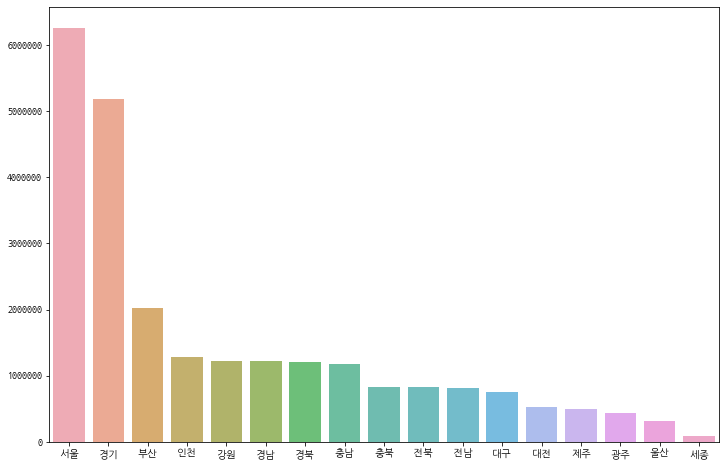

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

cnt_sido = jeju.CARD_SIDO_NM.value_counts()
plt.figure(figsize = (12,8))
sns.barplot(cnt_sido.index, cnt_sido.values, alpha=0.8)

plt.show()

시도별 데이터 레코드의 개수는 서울-경기-부산-인천 순으로 많으며\
제주는 14번째이다.

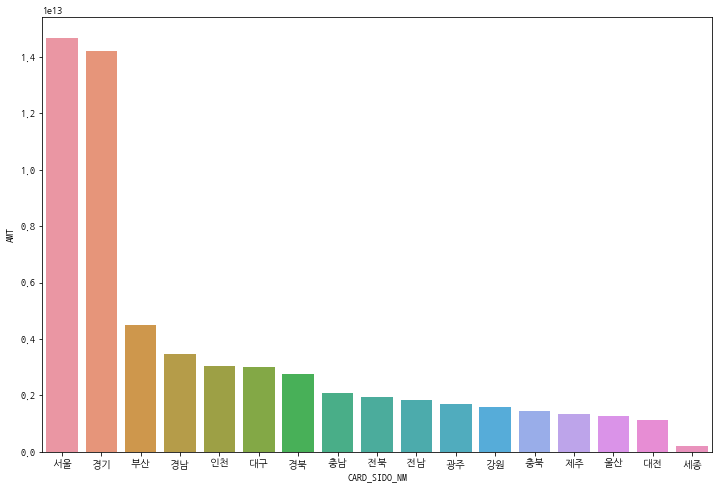

In [38]:
card_sido = jeju.groupby(['CARD_SIDO_NM'])['AMT'].sum().reset_index(drop = False)
card_sido = card_sido.sort_values(by=['AMT'], axis=0,ascending=False)
plt.figure(figsize = (12,8))
sns.barplot(card_sido.CARD_SIDO_NM, card_sido.AMT)

plt.show()

카드 금액 사용량은 서울-경기-부산-경남 순이며,\
제주는 14번째이다.

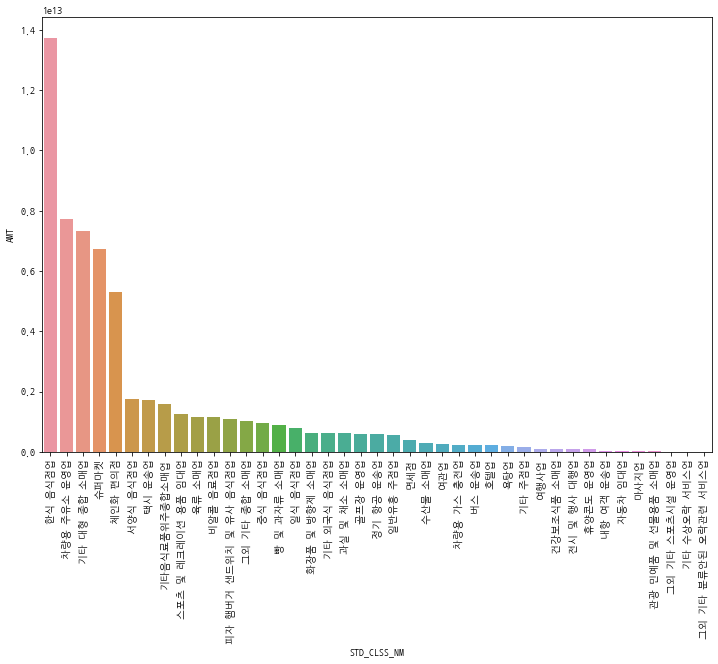

In [45]:
card_std = jeju.groupby(['STD_CLSS_NM'])[['AMT','CNT','CSTMR_CNT']].sum().reset_index(drop = False)
card_std = card_std.sort_values(by=['AMT'], axis=0,ascending=False)
plt.figure(figsize = (12,8))
sns.barplot(card_std.STD_CLSS_NM, card_std.AMT)

# fig, ax1 = plt.subplots(figsize=(15, 10))
# card_std['AMT'].plot(kind='bar', color='y')
# card_std['CNT'].plot(kind='line', marker='d', secondary_y=True)
# card_std['CSTMR_CNT'].plot(kind='line', marker='d', secondary_y=True)
# plt.legend()

plt.xticks(rotation='vertical')
plt.show()

업종별로 보았을 때는 한식 음식점업이 월등히 높고\
차량용 주유소 운영업-기타 대형 종합 소매업-슈퍼마켓-체인화편의점 순이다.\
10위까지를 보면 전반적으로 음식업과 소매업 그리고 운송업에 치중되어 있다.

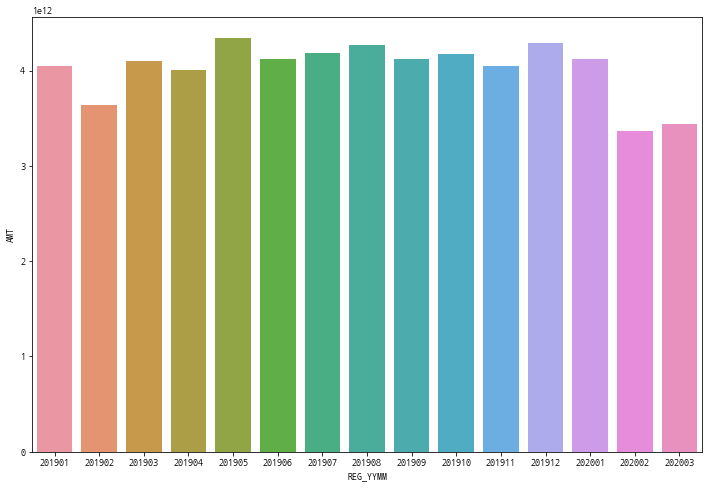

In [58]:
calendar = jeju.groupby(['REG_YYMM'])[['AMT','CNT','CSTMR_CNT']].sum().reset_index(drop = False)
plt.figure(figsize = (12,8))
sns.barplot(calendar.REG_YYMM, calendar.AMT)
plt.show()

월별 사용 금액은 비슷하지만,\
2020년 2월-3월에 급격히 줄어든 것을 볼 수 있다.

## 업종별 분석

{'whiskers': [<matplotlib.lines.Line2D at 0x165d1c7bb48>,
 'caps': [<matplotlib.lines.Line2D at 0x165d16c2648>,
 'boxes': [<matplotlib.lines.Line2D at 0x165d1605548>],
 'medians': [<matplotlib.lines.Line2D at 0x165d16c2b48>],
 'fliers': [<matplotlib.lines.Line2D at 0x165d1876c08>],
 'means': []}

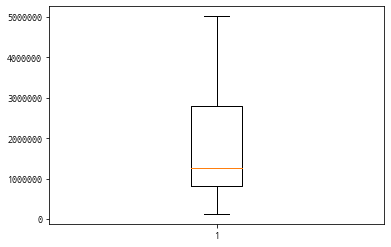

In [80]:
business_amt = jeju.groupby(['STD_CLSS_NM'])[['AMT','CNT','CSTMR_CNT']].mean().reset_index(drop = False)
plt.boxplot(business_amt['AMT'])

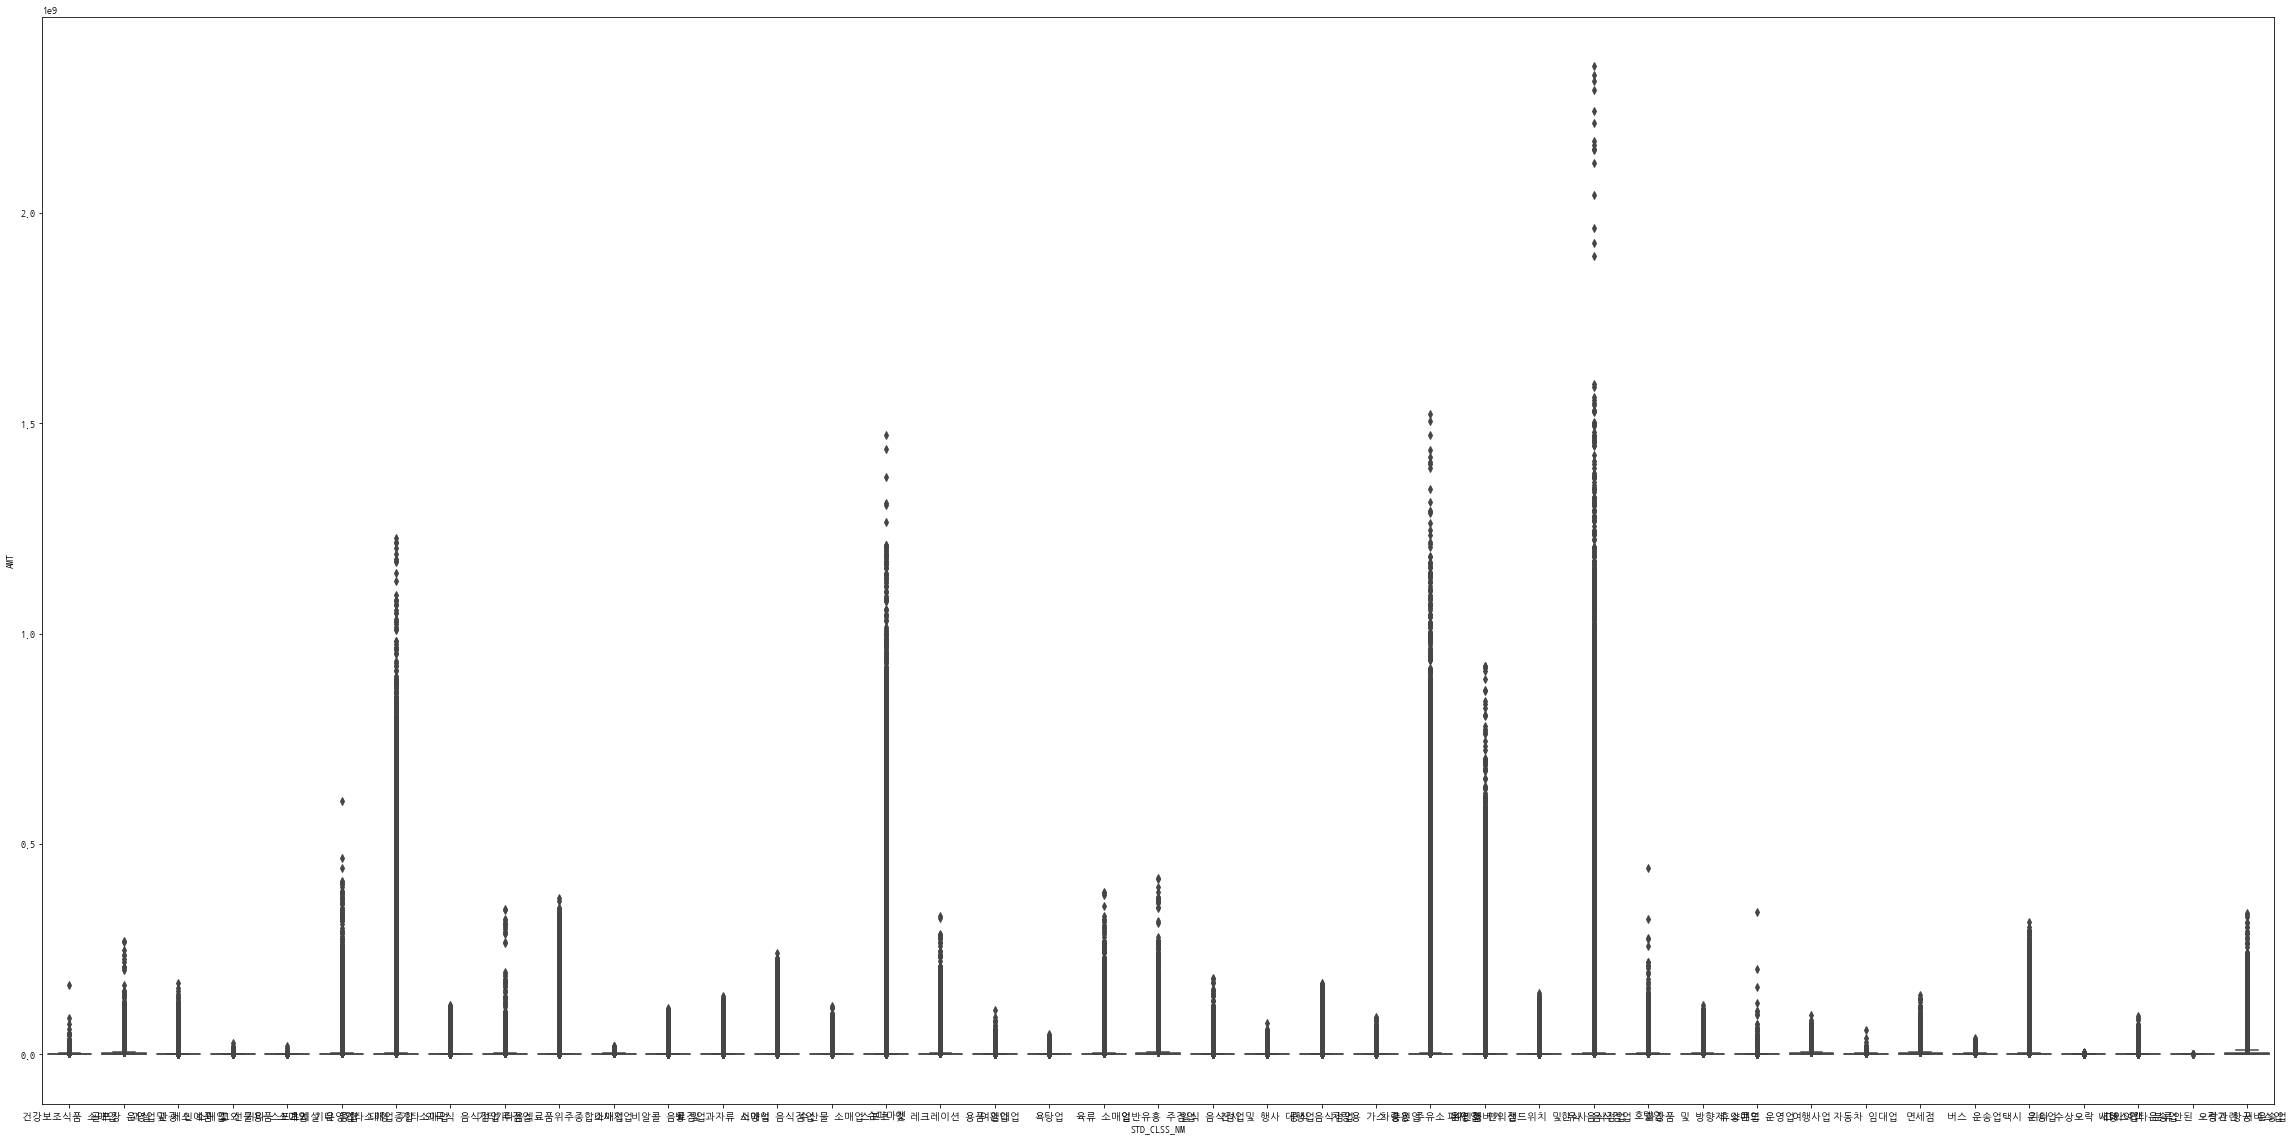

In [81]:
business_amt2 = jeju[['STD_CLSS_NM','AMT']]

plt.figure(figsize = (40,20))
ax = sns.boxplot(x = 'STD_CLSS_NM', y = 'AMT', data = business_amt2)

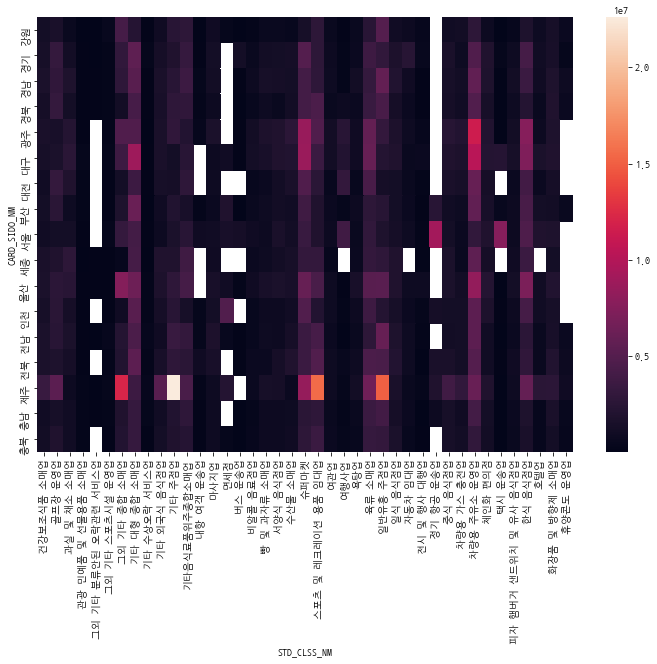

In [32]:
# jeju['AMT'] = jeju['AMT'][jeju['CARD_SIDO_NM']=='제주']*3

city_store = jeju.groupby(['CARD_SIDO_NM','STD_CLSS_NM'])['AMT'].aggregate('mean').reset_index()
city_store = city_store.pivot('CARD_SIDO_NM','STD_CLSS_NM','AMT')

plt.figure(figsize=(12,8))
sns.heatmap(city_store)
plt.show()

카드 가맹점 직역 및 업종에 따른 카드 사용 금액의 평균값으로 보았을 때,\
제주의 '스포츠 및 레크레이션 용품 임대업'과 '일반유흥 주점업'이 높은 것을 볼 수 있다.

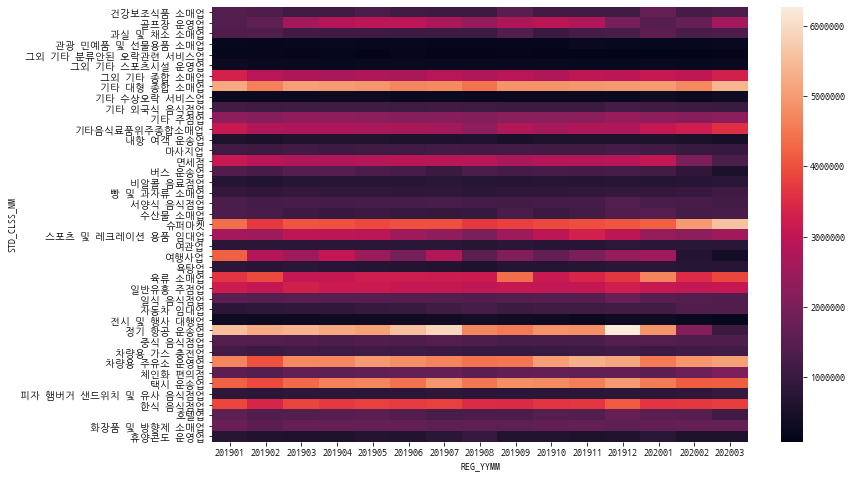

In [65]:
ym_cnt = jeju.groupby(['STD_CLSS_NM','REG_YYMM'])['AMT'].aggregate('mean').reset_index()
ym_cnt = ym_cnt.pivot('STD_CLSS_NM','REG_YYMM','AMT')

plt.figure(figsize=(12,8))
sns.heatmap(ym_cnt)
plt.show()

# Feature Engineering & Initial Modeling

## Data split

In [12]:
data_num.columns

Index(['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD',
       'FLC', 'year', 'month', 'CSTMR_CNT', 'AMT', 'CNT'],
      dtype='object')

In [7]:
X = data_num.drop(columns=['CSTMR_CNT', 'AMT', 'CNT'])
Y = np.log1p(data_num['AMT'])

In [20]:
y_train

293598    12.633629
225069    17.098805
841233    17.800555
325019    13.545015
651593    13.347507
            ...    
409880    11.674628
625347    12.784373
956303    16.812980
485954    15.543620
281734    20.095282
Name: AMT, Length: 518122, dtype: float64

In [23]:
x_train_all, x_test, y_train_all, y_test = train_test_split(X, Y, test_size = 0.3, shuffle = True)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size = 0.3, shuffle = True)

In [131]:
x_train.shape

(482630, 8)

## Modeling

In [ ]:
# Random Forest Model

from sklearn.ensemble import RandomForestRegressor

model_rf1 = RandomForestRegressor(n_estimators=1500,  max_features=8, random_state=0, n_jobs=-1)
model_rf1.fit(x_train, y_train)

In [ ]:
# Verification

from sklearn.metrics import mean_squared_error
pred_rf = model_rf1.predict(x_test)
mse = mean_squared_error(y_test, pred_rf)
print('mse=', mse)
print('rmse=', mse**0.5)

In [28]:
# Deep Learning Model
# Activation - Relu

from tensorflow.keras import layers

model2 = tf.keras.models.Sequential([
layers.Input(8),

layers.Dense(512, activation='sigmoid'),
layers.Dense(512, activation='sigmoid'),
layers.Dropout(0.3),
    
layers.Dense(256, activation='sigmoid'),
layers.Dense(256, activation='sigmoid'),
layers.Dropout(0.3),
    
layers.Dense(128, activation='sigmoid'),
layers.Dense(128, activation='sigmoid'),
layers.Dropout(0.3),    

layers.Dense(64, activation='sigmoid'),
layers.Dense(64, activation='sigmoid'),
layers.Dropout(0.3),
    
layers.Dense(1) ])

model2.compile(optimizers.Adam(lr=0.01), loss='mean_squared_logarithmic_error',
                 metrics=['mean_squared_logarithmic_error'])

hist = model2.fit(x_train, y_train, epochs=20, batch_size=256,
                    validation_data=(x_val, y_val),callbacks=[early_stop])

Epoch 1/20
2024/2024 [==============================] - 24s 12ms/step - loss: 0.0518 - mean_squared_logarithmic_error: 0.0518 - val_loss: 0.0262 - val_mean_squared_logarithmic_error: 0.0262
Epoch 2/20
2024/2024 [==============================] - 24s 12ms/step - loss: 0.0356 - mean_squared_logarithmic_error: 0.0356 - val_loss: 0.0262 - val_mean_squared_logarithmic_error: 0.0262
Epoch 3/20
2024/2024 [==============================] - 24s 12ms/step - loss: 0.0320 - mean_squared_logarithmic_error: 0.0320 - val_loss: 0.0262 - val_mean_squared_logarithmic_error: 0.0262
Epoch 4/20
2024/2024 [==============================] - 24s 12ms/step - loss: 0.0286 - mean_squared_logarithmic_error: 0.0286 - val_loss: 0.0263 - val_mean_squared_logarithmic_error: 0.0263
Epoch 5/20
2024/2024 [==============================] - 24s 12ms/step - loss: 0.0268 - mean_squared_logarithmic_error: 0.0268 - val_loss: 0.0264 - val_mean_squared_logarithmic_error: 0.0264
Epoch 6/20
2024/2024 [============================

In [9]:
# Deep Learning Model
# add Early Stop , change Dropout value

from tensorflow.keras import layers

model_st = tf.keras.models.Sequential([
layers.Input(8),
layers.Dense(256, activation='relu'),
layers.Dropout(0.3),
layers.Dense(128, activation='relu'),
layers.Dropout(0.3),
layers.Dense(64, activation='relu'),
layers.Dropout(0.3),
layers.Dense(32, activation='relu'),
layers.Dropout(0.3),
layers.Dense(16, activation='relu'),
layers.Dropout(0.3),
layers.Dense(8, activation='relu'),
layers.Dropout(0.3),
layers.Dense(1) ])

from tensorflow.keras import optimizers

model_st.compile(optimizers.Adam(lr=0.01), loss='mean_squared_logarithmic_error', metrics=['mean_squared_logarithmic_error'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'mean_squared_logarithmic_error', patience = 3, restore_best_weights = True)

hist = model_st.fit(x_train, y_train, epochs=100, batch_size=256,
                    validation_data=(x_val, y_val), callbacks=[early_stop])

Epoch 1/100
2024/2024 [==============================] - 8s 4ms/step - loss: 7.2494 - mean_squared_logarithmic_error: 7.2494 - val_loss: 7.3819 - val_mean_squared_logarithmic_error: 7.3819
Epoch 2/100
2024/2024 [==============================] - 8s 4ms/step - loss: 6.3894 - mean_squared_logarithmic_error: 6.3894 - val_loss: 7.3819 - val_mean_squared_logarithmic_error: 7.3819
Epoch 3/100
2024/2024 [==============================] - 8s 4ms/step - loss: 2.3038 - mean_squared_logarithmic_error: 2.3038 - val_loss: 0.0262 - val_mean_squared_logarithmic_error: 0.0262
Epoch 4/100
2024/2024 [==============================] - 8s 4ms/step - loss: 0.2002 - mean_squared_logarithmic_error: 0.2002 - val_loss: 0.0262 - val_mean_squared_logarithmic_error: 0.0262
Epoch 5/100
2024/2024 [==============================] - 8s 4ms/step - loss: 0.0394 - mean_squared_logarithmic_error: 0.0394 - val_loss: 0.0262 - val_mean_squared_logarithmic_error: 0.0262
Epoch 6/100
2024/2024 [==============================] 

In [51]:
# Verification

model_st.evaluate(x_train, y_train)

16192/16192 [==============================] - 14s 877us/step - loss: 0.0262 - mean_squared_logarithmic_error: 0.0262


[0.02617737650871277, 0.02617737650871277]

## Prediction

In [34]:
test1 = model_rf1.predict(x_test)
test1 = np.expm1(test1)

In [35]:
test1

array([3.57356498e+06, 1.05379599e+07, 1.71368431e+05, ...,
       5.08365326e+05, 9.26108661e+08, 3.50663249e+05])

# 제출 파일

In [36]:
# 예측 템플릿 만들기
CARD_SIDO_NMs = jeju['CARD_SIDO_NM'].unique()
STD_CLSS_NMs  = jeju['STD_CLSS_NM'].unique()
HOM_SIDO_NMs  = jeju['HOM_SIDO_NM'].unique()
AGEs          = jeju['AGE'].unique()
SEX_CTGO_CDs  = jeju['SEX_CTGO_CD'].unique()
FLCs          = jeju['FLC'].unique()
years         = [2020]
months        = [4, 7]

temp = []
for CARD_SIDO_NM in CARD_SIDO_NMs:
    for STD_CLSS_NM in STD_CLSS_NMs:
        for HOM_SIDO_NM in HOM_SIDO_NMs:
            for AGE in AGEs:
                for SEX_CTGO_CD in SEX_CTGO_CDs:
                    for FLC in FLCs:
                        for year in years:
                            for month in months:
                                temp.append([CARD_SIDO_NM, STD_CLSS_NM, HOM_SIDO_NM, AGE, SEX_CTGO_CD, FLC, year, month])
temp = np.array(temp)
temp = pd.DataFrame(data=temp, columns=['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'year', 'month'])

In [12]:
temp

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month
0,강원,건강보조식품 소매업,강원,20s,1,1,2020,4
1,강원,건강보조식품 소매업,강원,20s,1,1,2020,7
2,강원,건강보조식품 소매업,강원,20s,1,2,2020,4
3,강원,건강보조식품 소매업,강원,20s,1,2,2020,7
4,강원,건강보조식품 소매업,강원,20s,1,3,2020,4
...,...,...,...,...,...,...,...,...
1658855,충북,정기 항공 운송업,제주,10s,2,3,2020,7
1658856,충북,정기 항공 운송업,제주,10s,2,4,2020,4
1658857,충북,정기 항공 운송업,제주,10s,2,4,2020,7
1658858,충북,정기 항공 운송업,제주,10s,2,5,2020,4


In [13]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658860 entries, 0 to 1658859
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   CARD_SIDO_NM  1658860 non-null  object
 1   STD_CLSS_NM   1658860 non-null  object
 2   HOM_SIDO_NM   1658860 non-null  object
 3   AGE           1658860 non-null  object
 4   SEX_CTGO_CD   1658860 non-null  object
 5   FLC           1658860 non-null  object
 6   year          1658860 non-null  object
 7   month         1658860 non-null  object
dtypes: object(8)
memory usage: 101.2+ MB


In [37]:
# 인코딩
# Object 문자로 된 컬럼은 LabelEncoder로 인덱스 도출 (범주형 데이터를 dummies화 시켜서 one-hot 인코딩 사용하는 것과 비슷한 기능)
from sklearn.preprocessing import LabelEncoder

dtypes = temp.dtypes
encoders = {}
obj_col = ['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE']

for column in obj_col:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(temp[column])
        encoders[column] = encoder
        
temp_num = temp.copy()

for column in encoders.keys():
    encoder = encoders[column]
    temp_num[column] = encoder.transform(temp[column])
    
temp_num

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month
0,0,0,0,1,1,1,2020,4
1,0,0,0,1,1,1,2020,7
2,0,0,0,1,1,2,2020,4
3,0,0,0,1,1,2,2020,7
4,0,0,0,1,1,3,2020,4
...,...,...,...,...,...,...,...,...
1658855,16,30,14,0,2,3,2020,7
1658856,16,30,14,0,2,4,2020,4
1658857,16,30,14,0,2,4,2020,7
1658858,16,30,14,0,2,5,2020,4


In [38]:
temp_num = temp_num.astype('int32')
temp_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658860 entries, 0 to 1658859
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype
---  ------        --------------    -----
 0   CARD_SIDO_NM  1658860 non-null  int32
 1   STD_CLSS_NM   1658860 non-null  int32
 2   HOM_SIDO_NM   1658860 non-null  int32
 3   AGE           1658860 non-null  int32
 4   SEX_CTGO_CD   1658860 non-null  int32
 5   FLC           1658860 non-null  int32
 6   year          1658860 non-null  int32
 7   month         1658860 non-null  int32
dtypes: int32(8)
memory usage: 50.6 MB


### Model Predict

In [16]:
# DeepLearning Model

pred4 = model_st.predict(temp_num)
pred4 = np.round(pred4, 0)
pred4

array([[14.],
       [14.],
       [14.],
       ...,
       [14.],
       [14.],
       [14.]], dtype=float32)

In [40]:
# Random Forest Model

pred_rf = model_rf1.predict(temp_num)
pred_rf = np.expm1(pred_rf)
pred_rf = np.round(pred_rf, 0)
pred_rf

array([388923., 209429., 168094., ..., 123677., 128984., 123677.])

### Input prediction value to DF

In [42]:
temp_list = []

# # Deeplearning

# for i in range(len(pred4)):
#     temp_list.append(pred4[i][0])
# temp_list

# Random Forest

for i in range(len(pred_rf)):
    temp_list.append(pred_rf[i])
temp_list

[388923.0,
 209429.0,
 168094.0,
 156752.0,
 234400.0,
 278347.0,
 959020.0,
 750610.0,
 959020.0,
 750610.0,
 548944.0,
 452672.0,
 201477.0,
 267273.0,
 297708.0,
 464829.0,
 804021.0,
 905077.0,
 804021.0,
 905077.0,
 562483.0,
 201883.0,
 2877483.0,
 3091146.0,
 432750.0,
 664076.0,
 952024.0,
 831194.0,
 952024.0,
 831194.0,
 522285.0,
 258413.0,
 3165880.0,
 3223167.0,
 554806.0,
 928160.0,
 820510.0,
 980137.0,
 820510.0,
 980137.0,
 216270.0,
 173298.0,
 186301.0,
 164821.0,
 6128406.0,
 3082573.0,
 1471211.0,
 969120.0,
 1471211.0,
 969120.0,
 364372.0,
 243344.0,
 361748.0,
 239276.0,
 12011871.0,
 9762552.0,
 1158591.0,
 1105400.0,
 1158591.0,
 1105400.0,
 221675.0,
 186570.0,
 198977.0,
 184770.0,
 3365524.0,
 3368573.0,
 25664550.0,
 22605391.0,
 19720649.0,
 16295526.0,
 339169.0,
 241154.0,
 338730.0,
 239398.0,
 3975774.0,
 4133956.0,
 25890656.0,
 22059767.0,
 20105399.0,
 18136230.0,
 221675.0,
 186570.0,
 198977.0,
 184770.0,
 3105306.0,
 3067345.0,
 19692703.0,
 175

In [43]:
temp_series = pd.Series(temp_list)
temp_series

0          388923.0
1          209429.0
2          168094.0
3          156752.0
4          234400.0
             ...   
1658855    123677.0
1658856    128984.0
1658857    123677.0
1658858    128984.0
1658859    123677.0
Length: 1658860, dtype: float64

In [44]:
new = pd.concat([temp_num, temp_series], axis=1)
new.rename(columns= {0 : "AMT"}, inplace = True)

new

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,AMT
0,0,0,0,1,1,1,2020,4,388923.0
1,0,0,0,1,1,1,2020,7,209429.0
2,0,0,0,1,1,2,2020,4,168094.0
3,0,0,0,1,1,2,2020,7,156752.0
4,0,0,0,1,1,3,2020,4,234400.0
...,...,...,...,...,...,...,...,...,...
1658855,16,30,14,0,2,3,2020,7,123677.0
1658856,16,30,14,0,2,4,2020,4,128984.0
1658857,16,30,14,0,2,4,2020,7,123677.0
1658858,16,30,14,0,2,5,2020,4,128984.0


In [45]:
new['REG_YYMM'] = new['year']*100 + new['month']
new = new[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
new = new.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)

In [46]:
# 디코딩 
new['CARD_SIDO_NM'] = encoders['CARD_SIDO_NM'].inverse_transform(new['CARD_SIDO_NM'])
new['STD_CLSS_NM'] = encoders['STD_CLSS_NM'].inverse_transform(new['STD_CLSS_NM'])

In [50]:
# 제출 파일 만들기
submission = pd.read_csv('./jeju_data_ver1/submission.csv', index_col=0)
submission = submission.drop(['AMT'], axis=1)
submission = submission.merge(new, left_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')
submission.index.name = 'id'
submission.to_csv('submission_SS.csv', encoding='utf-8-sig')
submission.head()

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
id,,,,
0,202004,강원,건강보조식품 소매업,5.194644e+08
1,202004,강원,골프장 운영업,6.093961e+09
2,202004,강원,과실 및 채소 소매업,1.776007e+09
3,202004,강원,관광 민예품 및 선물용품 소매업,1.103811e+08
4,202004,강원,그외 기타 분류안된 오락관련 서비스업,1.017853e+08
